In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./artifacts/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
X = df.iloc[:, 2:-1].values
y = df.iloc[:, 4].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [6]:
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()

X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

In [7]:
X_test

array([[-0.94049789,  0.58344675],
       [ 1.65066976, -0.89176627],
       [ 1.55470059,  1.14402769],
       [-0.26871368, -1.36383443],
       [ 0.30710135,  0.05237006],
       [ 0.11516301,  0.1703871 ],
       [-0.26871368, -0.4196981 ],
       [-1.03646706,  0.78997657],
       [-1.80422043,  0.19989136],
       [-1.2284054 , -1.06879183],
       [ 0.40307052,  0.0228658 ],
       [-0.17274451,  0.1703871 ],
       [ 1.65066976,  1.79312142],
       [ 0.88291638, -0.5672194 ],
       [-0.26871368, -0.5672194 ],
       [ 1.07485473, -1.21631313],
       [-1.2284054 ,  0.52443823],
       [-0.26871368,  2.29469384],
       [ 1.07485473,  0.58344675],
       [-1.90018961,  0.37691693],
       [-0.65259037,  0.14088284],
       [ 0.78694721, -0.30168106],
       [ 0.88291638,  1.29154899],
       [-1.80422043, -1.27532165],
       [-0.36468285,  1.35055751],
       [-0.46065203, -0.2721768 ],
       [ 0.21113218, -0.65573218],
       [ 0.01919383, -0.24267254],
       [-0.46065203,

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7, p=2, metric="minkowski")

In [9]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [10]:
y_predictor = classifier.predict(X_test)

In [11]:
y_predictor

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [12]:
# In classifiers, the confusion matrix has to be created
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predictor)
cm

array([[24,  1],
       [ 2, 13]], dtype=int64)

In [13]:
# Visualising the Training set results - Contour Graph
def plot_contour_graph(X_point, y_point):
    from matplotlib.colors import ListedColormap
    # X_point, y_point = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_point[:, 0].min() - 1, stop = X_point[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_point[:, 1].min() - 1, stop = X_point[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_point)):
        plt.scatter(X_point[y_point == j, 0], X_point[y_point == j, 1],
                    c = ListedColormap(('green', 'blue'))(i), label = j)
    plt.title('K-NN Training set')
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.legend()


C:\Users\Samir Ahmad\AppData\Local\Temp\ipykernel_13500\1041606141.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_point[y_point == j, 0], X_point[y_point == j, 1],


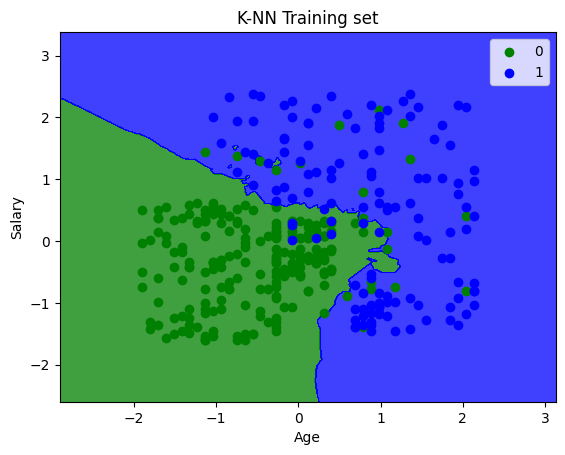

In [14]:
plot_contour_graph(X_train, y_train)

C:\Users\Samir Ahmad\AppData\Local\Temp\ipykernel_13500\1041606141.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_point[y_point == j, 0], X_point[y_point == j, 1],


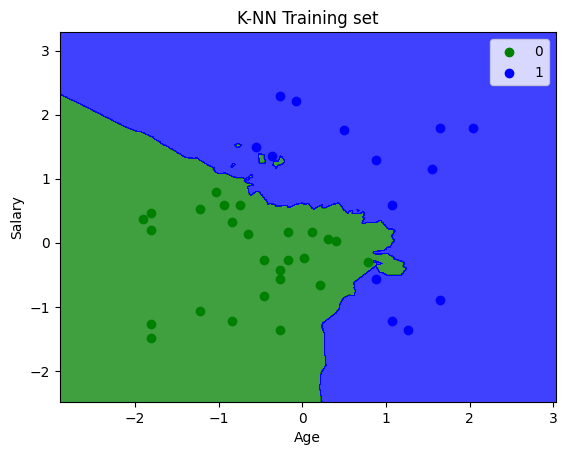

In [15]:
plot_contour_graph(X_test, y_predictor)